# EDA

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("../data/final/viviendas_2011_2024.csv")

In [3]:
df.head()              

,Ano,Distrito,Esperanza_vida,Renta_neta_persona,Renta_neta_hogar,Renta_bruta_persona,Renta_bruta_hogar,Edad_media,Mayores_65anos%,Menores_18anos%,...,Terraza,Planta,Exterior,Ascensor,Ano_construccion,Ano_reforma,Tipo_vivienda,Banos,Precio_predicho,Precio_ajustado
0,2011,CENTRO,83.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,0.0,False,False,NaN,NaN,apartamento,1,672.875811,657.471490
1,2011,CENTRO,83.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,5.0,True,True,NaN,NaN,apartamento,1,923.555035,894.792822
2,2011,CENTRO,83.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,3.0,True,True,1910.0,NaN,apartamento,2,1424.913483,1434.552312
3,2011,CENTRO,83.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,4.0,True,True,NaN,NaN,apartamento,1,2240.808388,2335.359589
4,2011,CENTRO,83.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,3.0,True,True,1940.0,NaN,apartamento,1,1583.237203,1571.481771


In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209216 entries, 0 to 209215
Data columns (total 32 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Ano                       209216 non-null  int64  
 1   Distrito                  209216 non-null  object 
 2   Esperanza_vida            209216 non-null  float64
 3   Renta_neta_persona        119552 non-null  float64
 4   Renta_neta_hogar          119552 non-null  float64
 5   Renta_bruta_persona       119552 non-null  float64
 6   Renta_bruta_hogar         119552 non-null  float64
 7   Edad_media                119552 non-null  float64
 8   Mayores_65anos%           119552 non-null  float64
 9   Menores_18anos%           119552 non-null  float64
 10  Tamano_vivienda_personas  119552 non-null  float64
 11  Paro_registrado%          119552 non-null  float64
 12  Apartamentos_turisticos   149440 non-null  float64
 13  Superficie_distrito_ha    209216 non-null  f

* Variables socioeconómicas (119.552 valores, no todos completos):
Renta_neta_persona, Renta_bruta_hogar, Edad_media, % Mayores_65, % Menores_18, Paro_registrado%, etc.
Hay ~90.000 valores faltantes en estas columnas.

* Variables urbanísticas:
Superficie_distrito_ha, Densidad_poblacion, Zonas_verdes%.

* Características de la vivienda:
Habitaciones, Baños, Tamaño, Garaje, Piscina, Trastero, Terraza, Ascensor, Exterior, Planta.
Aquí prácticamente no hay valores nulos (salvo Planta con ~19k nulos).

* Variables temporales:
Año, Ano_construccion (muchos nulos), Ano_reforma (casi todo nulo).

* Variables de precio:
Precio_predicho y Precio_ajustado (variable más importante a analizar).

In [5]:
df.describe()

,Ano,Esperanza_vida,Renta_neta_persona,Renta_neta_hogar,Renta_bruta_persona,Renta_bruta_hogar,Edad_media,Mayores_65anos%,Menores_18anos%,Tamano_vivienda_personas,...,Densidad_poblacion,Zonas_verdes%,Habitaciones,Tamano,Planta,Ano_construccion,Ano_reforma,Banos,Precio_predicho,Precio_ajustado
count,209216.000000,209216.000000,119552.000000,119552.000000,119552.000000,119552.000000,119552.000000,119552.000000,119552.000000,119552.000000,...,119552.000000,209216.000000,209216.000000,209216.000000,190134.000000,4634.000000,854.000000,209216.000000,2.092160e+05,2.092160e+05
mean,2017.500000,84.785757,18526.828694,45578.841299,23943.278456,58837.655020,43.946192,0.206314,0.151073,2.453093,...,164.035604,0.088046,2.525294,114.022952,2.963552,1978.682779,2016.983607,1.090203,2.695656e+05,2.696068e+05
std,4.031139,1.228507,5477.531582,12855.470597,8207.538328,19422.961439,1.834644,0.033416,0.030084,0.200601,...,94.199420,0.051397,1.241851,101.732441,2.764383,33.299016,15.070984,0.371857,4.656545e+05,4.669162e+05
min,2011.000000,80.500000,9276.000000,24690.000000,10720.000000,28371.000000,37.600000,0.119000,0.081000,1.900000,...,9.744894,0.014480,1.000000,10.000000,-2.000000,1880.000000,1920.000000,1.000000,2.537829e+02,2.547977e+02
25%,2014.000000,84.000000,14100.000000,34702.000000,17267.000000,42537.000000,42.800000,0.183000,0.131000,2.300000,...,70.506092,0.057229,2.000000,63.000000,1.000000,1960.000000,2018.000000,1.000000,1.313432e+03,1.315580e+03
50%,2017.500000,84.800000,18314.000000,42465.000000,23515.000000,53908.000000,43.800000,0.205000,0.148000,2.500000,...,177.193772,0.065164,2.000000,86.000000,2.000000,1980.000000,2020.000000,1.000000,1.382166e+05,1.379100e+05
75%,2021.000000,85.600000,23009.000000,56302.000000,30332.000000,74953.000000,45.600000,0.237000,0.169000,2.600000,...,251.176313,0.119151,3.000000,126.000000,4.000000,2006.000000,2023.000000,1.000000,3.336662e+05,3.329751e+05
max,2024.000000,89.400000,30506.000000,74842.000000,42678.000000,104706.000000,47.800000,0.268000,0.222000,2.800000,...,295.413746,0.216774,16.000000,3015.000000,44.000000,2025.000000,2025.000000,10.000000,1.119899e+07,1.196070e+07


In [6]:
df.describe(exclude='number')

,Distrito,Operacion,Garaje,Trastero,Piscina,Terraza,Exterior,Ascensor,Tipo_vivienda
count,209216,209216,209216,209216,209216,209216,209216,209216,209216
unique,21,2,2,2,2,2,2,2,8
top,CHAMARTIN,venta,False,False,False,False,True,True,apartamento
freq,15120,128632,193228,197890,195776,175294,170338,156394,183918


In [7]:
# Columnas que faltan mas datos
df.isna().sum().sort_values(ascending=False)

Ano_reforma                 208362
Ano_construccion            204582
Renta_neta_persona           89664
Renta_bruta_hogar            89664
Edad_media                   89664
Tamano_vivienda_personas     89664
Renta_bruta_persona          89664
Renta_neta_hogar             89664
Densidad_poblacion           89664
Paro_registrado%             89664
Menores_18anos%              89664
Mayores_65anos%              89664
Apartamentos_turisticos      59776
Planta                       19082
Distrito                         0
Esperanza_vida                   0
Zonas_verdes%                    0
Superficie_distrito_ha           0
Ano                              0
Habitaciones                     0
Garaje                           0
Trastero                         0
Tamano                           0
Operacion                        0
Terraza                          0
Piscina                          0
Ascensor                         0
Exterior                         0
Tipo_vivienda       

In [8]:
round((df.isna().mean()*100).sort_values(ascending=False), 2)

Ano_reforma                 99.59
Ano_construccion            97.79
Renta_neta_persona          42.86
Renta_bruta_hogar           42.86
Edad_media                  42.86
Tamano_vivienda_personas    42.86
Renta_bruta_persona         42.86
Renta_neta_hogar            42.86
Densidad_poblacion          42.86
Paro_registrado%            42.86
Menores_18anos%             42.86
Mayores_65anos%             42.86
Apartamentos_turisticos     28.57
Planta                       9.12
Distrito                     0.00
Esperanza_vida               0.00
Zonas_verdes%                0.00
Superficie_distrito_ha       0.00
Ano                          0.00
Habitaciones                 0.00
Garaje                       0.00
Trastero                     0.00
Tamano                       0.00
Operacion                    0.00
Terraza                      0.00
Piscina                      0.00
Ascensor                     0.00
Exterior                     0.00
Tipo_vivienda                0.00
Banos         

**Altos porcentajes de nulos**

- Ano_reforma: 208k nulos, casi todo el dataset.
Esta variable probablemente no sea útil, salvo que se quiera analizar reformas puntuales. Podría eliminarse o imputarse como "Sin reforma".

- Ano_construccion: 204k nulos, muchos faltantes.
Similar al anterior, puede usarse parcialmente o imputarse con alguna media/mediana por distrito.

**Bloque socioeconómico (~90k nulos cada uno):**

- Tamano_vivienda_personas, Densidad_poblacion, Renta_neta_persona, Renta_bruta_hogar, Edad_media, % Mayores_65, % Menores_18, Paro_registrado%.
Aquí parece que solo hay datos para ciertos distritos o años, habría que analizar si se concentran en un periodo específico o en distritos concretos.

**Variables urbanísticas / de contexto**

- Apartamentos_turisticos: ~59k nulos

- Planta: ~19k nulos. Podría imputarse como “desconocido” o ignorarse.

In [9]:
round((df[(df['Ano'] >= 2015) & (df['Ano'] <= 2022)].isna().mean()*100).sort_values(ascending=False), 2)

Ano_reforma                 99.59
Ano_construccion            97.79
Planta                       9.12
Ano                          0.00
Renta_neta_hogar             0.00
Distrito                     0.00
Esperanza_vida               0.00
Renta_neta_persona           0.00
Mayores_65anos%              0.00
Menores_18anos%              0.00
Tamano_vivienda_personas     0.00
Paro_registrado%             0.00
Apartamentos_turisticos      0.00
Renta_bruta_persona          0.00
Renta_bruta_hogar            0.00
Edad_media                   0.00
Zonas_verdes%                0.00
Densidad_poblacion           0.00
Superficie_distrito_ha       0.00
Habitaciones                 0.00
Garaje                       0.00
Trastero                     0.00
Tamano                       0.00
Operacion                    0.00
Terraza                      0.00
Piscina                      0.00
Ascensor                     0.00
Exterior                     0.00
Tipo_vivienda                0.00
Banos         

Entre los años 2015 y 2022 no hay nulos de variables socioeconómicas, por lo que se usará para el entrenamiento de modelos, y los años 2023 y 2024 se podrán utilizar para test y validación.

### Gestión de nulos

**Año de construcción y año de reforma**

Existen más del 95% de nulos en ambas columnas, por lo que imputarlos no sería útil. Por tanto, se pueden eliminar del dataset.

**Planta**

Supone menos del 10% de datos totales. Podemos imputarlos por la mediana de datos por distrito y añadir una columna "Planta_is_missing" para mantener la trazabilidad.

### Outliers en variables numéricas
Validación de outliers por tipo de operación

In [12]:
def detectar_outliers(col, subset):
    q1 = subset[col].quantile(0.25)
    q3 = subset[col].quantile(0.75)
    iqr = q3 - q1
    low  = q1 - 1.5*iqr
    high = q3 + 1.5*iqr
    outliers = subset[(subset[col] < low) | (subset[col] > high)]
    return outliers, low, high


--- ALQUILER ---
Registros totales: 80584
Outliers detectados: 5710
Rango aceptado: 0 - 2723.72
Porcentaje del total: 7.09%


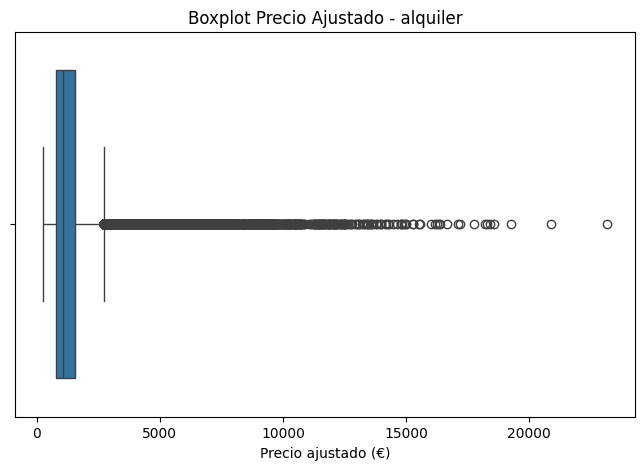


--- VENTA ---
Registros totales: 128632
Outliers detectados: 9803
Rango aceptado: 0 - 1063657.11
Porcentaje del total: 7.62%


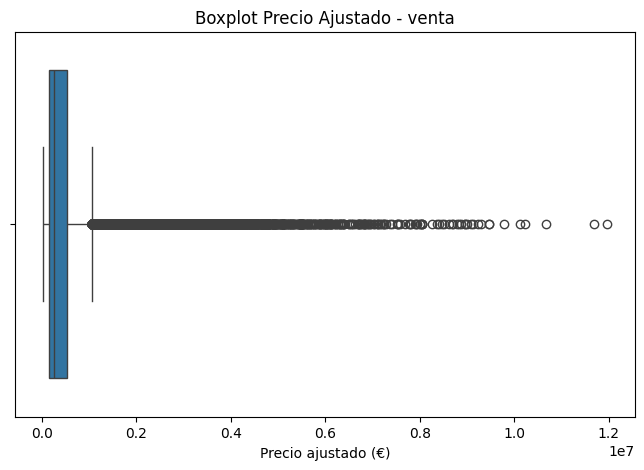

In [13]:
# Separar por operación
for oper in df["Operacion"].unique():
    subset = df[df["Operacion"] == oper]
    outliers, low, high = detectar_outliers("Precio_ajustado", subset)

    print(f"\n--- {oper.upper()} ---")
    print(f"Registros totales: {subset.shape[0]}")
    print(f"Outliers detectados: {outliers.shape[0]}")
    print(f"Rango aceptado: 0 - {high:.2f}")
    print(f"Porcentaje del total: {round(outliers.shape[0] / subset.shape[0] * 100, 2)}%")

    # Visualización
    plt.figure(figsize=(8,5))
    sns.boxplot(x=subset["Precio_ajustado"])
    plt.xlabel("Precio ajustado (€)")
    plt.title(f"Boxplot Precio Ajustado - {oper}")
    plt.show()

**Conclusión sobre Precio_ajustado en alquiler**

- El rango intercuartílico (IQR) determina un intervalo de precios aceptado entre aproximadamente 0 € y 2.723 € al mes.
- Se detectaron 5.710 outliers (≈ 7,1% del total de registros de alquiler).

**Conclusión sobre Precio_ajustado en venta**

- El rango intercuartílico (IQR) establece un intervalo de precios aceptado entre 0 € y ~1.064.000 €.
- Se detectaron 9.803 outliers (≈ 7,6% de los registros de venta).
- Se observan precios extremos que superan los 10 millones de euros (hasta ~12 millones), que muy probablemente corresponden a propiedades excepcionales que distorsionan el análisis general.

**Conclusiones finales**

Los outliers se tratan de valores que no son erróneos, por lo que no se eliminarán.

En el caso de utilizar modelos a los que le puedan afectar (lineales y basados en distancias), se usará un escalado robusto que pueda tratar outliers (como por ejemplo, `RobustScaler` de `Scikit-learn`).

### Correlaciones

Evaluamos correlaciones para observar relación entre variables.

Para ello, sacaremos la correlación de Pearson (lineal) y la de Spearman (monótona - no lineal).

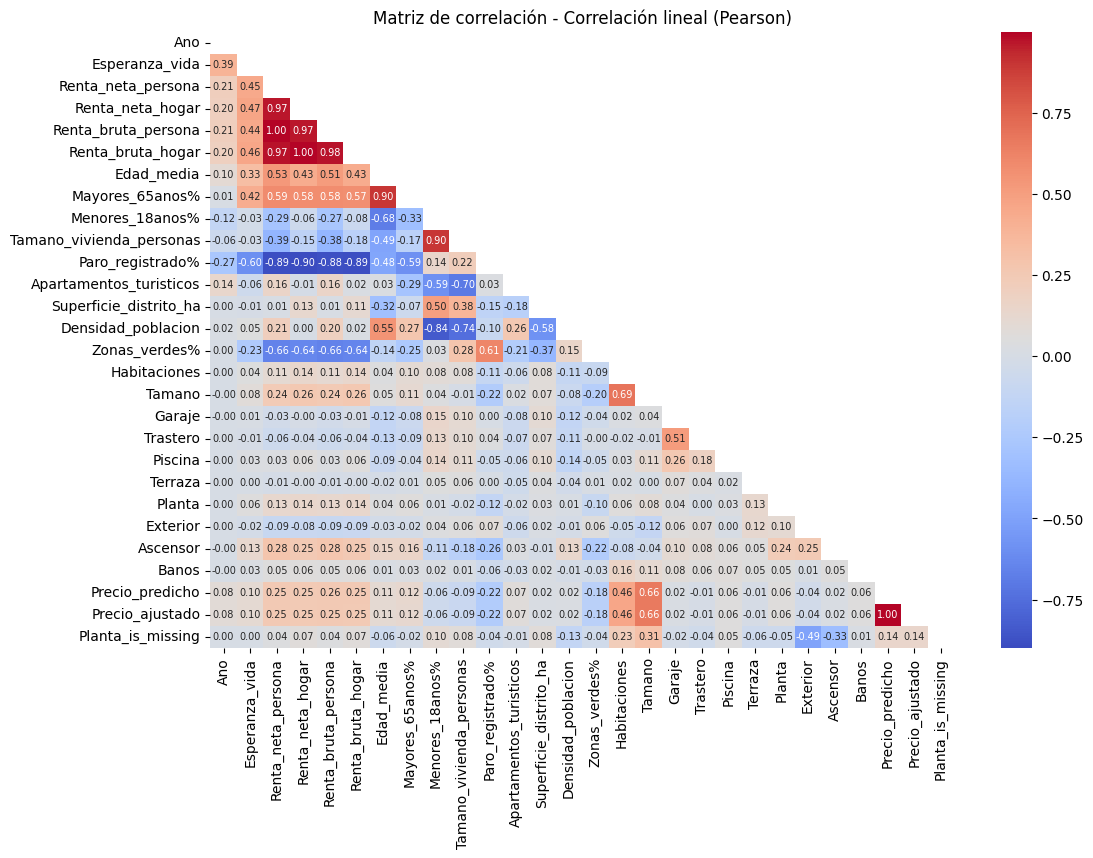

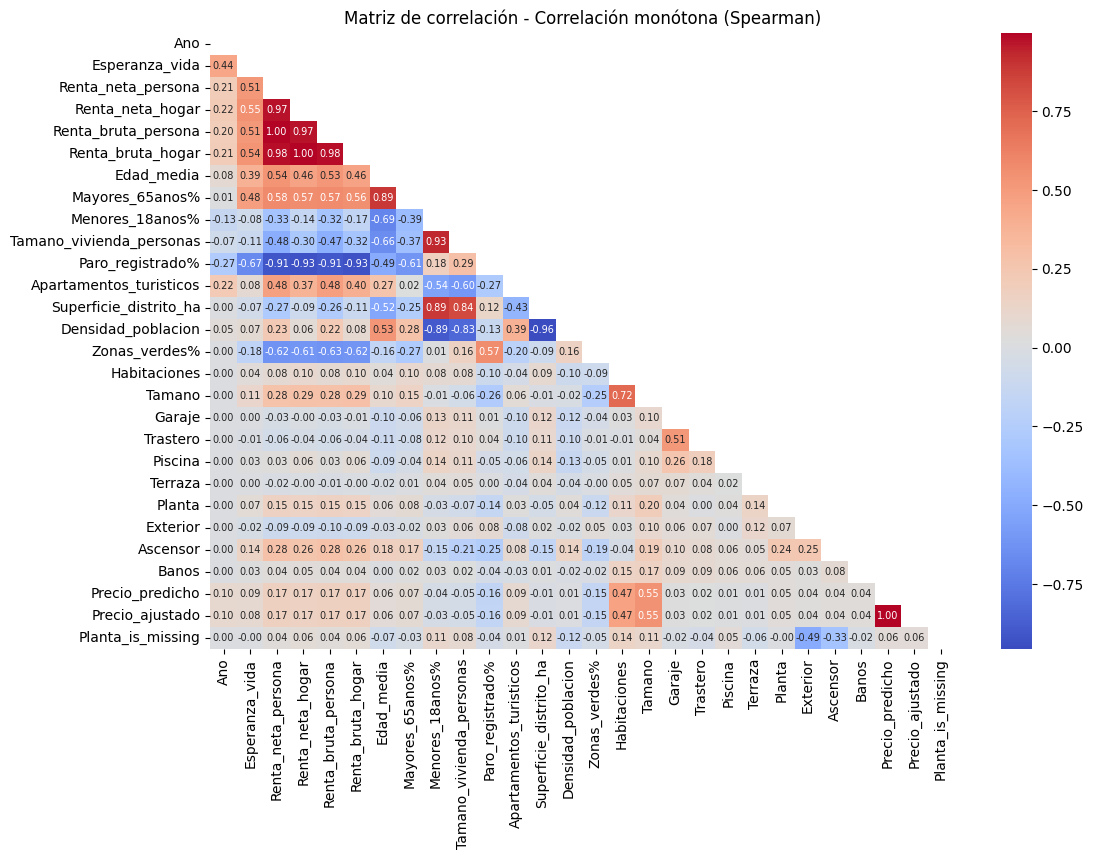

In [14]:
correlaciones_pearson = df.corr(numeric_only=True, method='pearson')
mask = np.triu(np.ones_like(correlaciones_pearson, dtype=bool)) # Para recortar la matriz y dejar datos sin repetir.

plt.figure(figsize=(12,8))
sns.heatmap(correlaciones_pearson, annot=True, mask=mask, cmap='coolwarm', fmt='.2f', annot_kws={'size': 7})
plt.title('Matriz de correlación - Correlación lineal (Pearson)')
plt.show()

correlaciones_spearman = df.corr(numeric_only=True, method='spearman')
mask = np.triu(np.ones_like(correlaciones_spearman, dtype=bool)) # Para recortar la matriz y dejar datos sin repetir.

plt.figure(figsize=(12,8))
sns.heatmap(correlaciones_spearman, annot=True, mask=mask, cmap='coolwarm', fmt='.2f', annot_kws={'size': 7})
plt.title('Matriz de correlación - Correlación monótona (Spearman)')
plt.show()

**Conclusiones**

Podemos observar que existen algunas correlaciones fuertes (>90%) entre variables input:
- Corr. lineal y no lineal positiva entre tamaño de vivienda de personas y menores de 18 años.
- Corr. no lineal negativa entre densidad de población y superficie del distrito.
- Corr. lineal positiva entre mayores de 65 años y edad media.
- Corr. lineal y no lineal positiva entre los diferentes tipos de rentas.
- Corr. lineal y principalmente no lineal entre los diferentes tipos de rentas con el paro registrado.

Esto nos hace llegar a la conclusión de que, para los modelos predictivos, podemos eliminar variables para evitar multicolinealidad (en el caso de usar modelos lineales o basados en distancias). También pueden eliminarse en el caso de usar otros modelos no afectados por esto, para simplificarlos y reducir costes computacionales.

Teniendo esto en cuenta, se pueden eliminar las siguientes variables:
- Tamano_vivienda_personas -> el porcentaje de menores de 18 años explica gran parte de ello.
- Densidad_población -> la superficie de distrito explica gran parte de ello y no tiene nulos como la densidad.
- Edad_media -> el porcentaje de mayores de 65 años explica gran parte de ello. Además, tenemos la variable de menores de 18 años.
- Rentas (todas) -> son explicativas entre ellas, y el porcentaje de paro registrado las explica en gran medida a todas.

### Comprobación adicional del dataset

In [15]:
# Revisión de variables categóricas

print("Operaciones únicas:", df["Operacion"].unique())
print("Tipos de vivienda únicos:", df["Tipo_vivienda"].unique()[:10])  # primeros 10
print("Número de distritos:", df["Distrito"].nunique())

Operaciones únicas: ['alquiler' 'venta']
Tipos de vivienda únicos: ['apartamento' 'estudio' 'ático' 'dúplex' 'loft' 'tríplex' 'chalet'
 'mansión']
Número de distritos: 21


In [16]:
mask = (df['Ano'] >= 2015) & (df['Ano'] <= 2022) # Cogemos datos que se usarán para el modelo

resumen = pd.DataFrame({
    "Tipo": df[mask].dtypes,
    "Nulos": df[mask].isna().sum(),
    "Nulos_%": (df[mask].isna().mean()*100).round(2)
})
print(resumen)

                             Tipo  Nulos  Nulos_%
Ano                         int64      0      0.0
Distrito                   object      0      0.0
Esperanza_vida            float64      0      0.0
Renta_neta_persona        float64      0      0.0
Renta_neta_hogar          float64      0      0.0
Renta_bruta_persona       float64      0      0.0
Renta_bruta_hogar         float64      0      0.0
Edad_media                float64      0      0.0
Mayores_65anos%           float64      0      0.0
Menores_18anos%           float64      0      0.0
Tamano_vivienda_personas  float64      0      0.0
Paro_registrado%          float64      0      0.0
Apartamentos_turisticos   float64      0      0.0
Superficie_distrito_ha    float64      0      0.0
Densidad_poblacion        float64      0      0.0
Zonas_verdes%             float64      0      0.0
Habitaciones                int64      0      0.0
Operacion                  object      0      0.0
Tamano                    float64      0      0.0


Los tipos de datos son correctos y no quedan nulos entre años 2015 y 2022.

## Estadísticos generales

In [17]:
df.groupby("Operacion")[["Precio_ajustado","Tamano","Habitaciones","Banos"]].describe().T

Operacion                  alquiler         venta
Precio_ajustado count  80584.000000  1.286320e+05
                mean    1377.213782  4.376444e+05
                std     1107.062769  5.303567e+05
                min      254.797700  2.109031e+04
                25%      787.848597  1.573812e+05
                50%     1069.499021  2.635398e+05
                75%     1562.196470  5.198915e+05
                max    23141.548404  1.196070e+07
Tamano          count  80584.000000  1.286320e+05
                mean      97.656185  1.242762e+02
                std       81.426916  1.113847e+02
                min       10.000000  1.200000e+01
                25%       57.000000  6.700000e+01
                50%       78.000000  9.300000e+01
                75%      110.000000  1.380000e+02
                max     1300.000000  3.015000e+03
Habitaciones    count  80584.000000  1.286320e+05
                mean       2.148019  2.761646e+00
                std        1.085629  1.274739e+00
                min        1.000000  1.000000e+00
                25%        1.000000  2.000000e+00
                50%        2.000000  3.000000e+00
                75%        3.000000  3.000000e+00
                max        9.000000  1.600000e+01
Banos           count  80584.000000  1.286320e+05
                mean       1.094858  1.087288e+00
                std        0.359091  3.796072e-01
                min        1.000000  1.000000e+00
                25%        1.000000  1.000000e+00
                50%        1.000000  1.000000e+00
                75%        1.000000  1.000000e+00
                max        6.000000  1.000000e+01

#### **Conclusiones de las estadísticas generales**

1. Precio ajustado

**Alquiler**
- Media: aprox 1.377 €
- Mediana: aprox 1.070 €
- Rango intercuartílico: aprox 788 € (Q1) – aprox 1.562 € (Q3)
- Máximo: aprox 23.142 €
- Distribución asimétrica (muchos alquileres económicos y unos pocos muy caros).

**Venta**
- Media: aprox 437.640 €
- Mediana: aprox 263.540 €
- Rango intercuartílico: aprox 157.381 € (Q1) – aprox 519.892 € (Q3)
- Máximo: aprox 11.960.700€

2. Tamaño (m²)

**Alquiler**

- Media: aprox 98 m², Mediana: 78 m².
- Hay viviendas muy pequeñas (10 m² - estudios).
- Valores muy grandes (1.300 m²), mansiones/pisos de lujo.

**Venta**
- Media: aprox 124 m², Mediana: 93 m².
- Similar patrón, pero en venta predominan viviendas algo más grandes.

3. Habitaciones

**Alquiler**
- Mediana = 2, con mayoría entre 1–3 habitaciones.

**Venta**
- Mediana = 3, con más oferta de pisos grandes (hasta 16 habitaciones).

4. Baños

- En ambas operaciones, la mayoría de las viviendas tienen 1 baño.
- En venta, hay viviendas con hasta 10 baños (mansiones / casas grandes).

### **Distribución de precios**

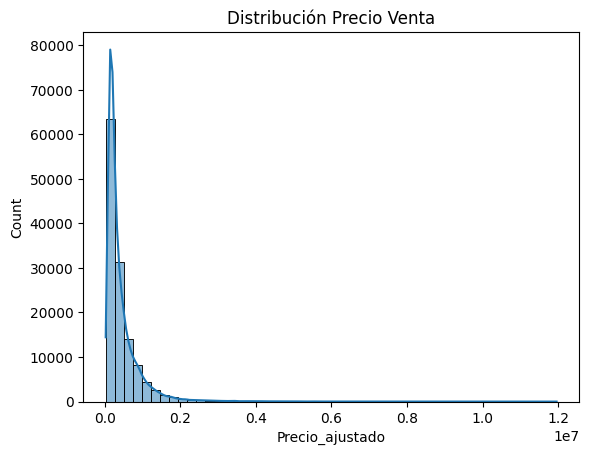

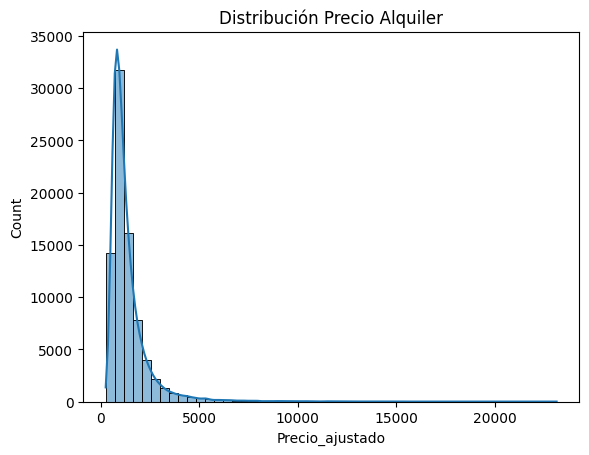

In [18]:
sns.histplot(data=df[df["Operacion"]=="venta"], x="Precio_ajustado", bins=50, kde=True)
plt.title("Distribución Precio Venta")
plt.show()

sns.histplot(data=df[df["Operacion"]=="alquiler"], x="Precio_ajustado", bins=50, kde=True)
plt.title("Distribución Precio Alquiler")
plt.show()

#### **Conclusiones de la distribución de precios**

Venta

- Distribución principalmente a la izquierda.
- La gran mayoría de las viviendas están por debajo de los 2 millones de euros, con un pico muy fuerte en el rango bajo (hasta 250.000€).

Alquiler

- También muy distribuido en la izquierda.
- La mayoría de los alquileres se concentran por debajo de 5000€ al mes.
- Existen outliers significativos con precios de más de 10.000–15.000 €, pero son casos muy raros (pueden ser pisos muy lujosos).
- El pico más fuerte se encuentra sobre los 1.200€. 

### **Precios por distrito**

Ranking de distritos más caros y más baratos

In [19]:
precios_distrito = df.groupby(["Distrito","Operacion"])["Precio_ajustado"].median().unstack()
print(precios_distrito.sort_values("venta", ascending=False).head(21))


Operacion             alquiler          venta
Distrito                                     
MONCLOAARAVACA     1279.126538  689848.564764
SALAMANCA          1561.977356  672567.190979
CHAMARTIN          1349.370334  599885.910952
CHAMBERI           1466.974710  550380.116722
HORTALEZA          1182.335309  433631.094888
FUENCARRALELPARDO  1135.509498  404426.773716
CENTRO             1199.696761  398220.311796
RETIRO             1178.189490  392137.770727
BARAJAS            1027.560566  335321.955428
ARGANZUELA          913.219577  302156.026130
TETUAN              962.920735  249690.048828
CIUDADLINEAL        922.868059  220472.802292
VICALVARO           848.821570  209900.271164
SANBLASCANILLEJAS   822.162778  203004.439169
VILLADEVALLECAS     592.492776  188225.984867
MORATALAZ           859.697173  177548.771596
LATINA              746.796139  154919.970358
CARABANCHEL         709.725391  153237.911149
USERA               692.878505  147106.349804
PUENTEDEVALLECAS    648.123628  12

#### **Conclusiones del ranking de precio por distrito**

**Venta (precio mediano)**

- Distritos más caros:

   - Moncloa-Aravaca.
   - Salamanca.
   - Chamartín.
   - Chamberí.
   - Hortaleza.

Coincide con las zonas premium de Madrid, con mayor demanda y oferta de alto nivel.

- Distritos más baratos:

   - Villaverde.
   - Puente de Vallecas.
   - Usera.
   - Carabanchel.
   - Latina.

Zonas periféricas o tradicionalmente más asequibles.

**Alquiler (precio mediano, €/mes)**

- Más caros:

   - Salamanca.
   - Chamberí.
   - Chamartín.
   - Moncloa-Aravaca.
   - Centro.

- Más baratos:

   - Villaverde.
   - Villa de Vallecas.
   - Puente de Vallecas.
   - Usera.
   - Carabanchel.

La brecha es clara: generalmente, los distritos más caros en venta también lo son en alquiler.

Insights importantes

- Salamanca lidera tanto en venta como en alquiler - mercado de lujo consolidado.
- Distritos como Villaverde, Usera, Carabanchel y Puente de Vallecas concentran los precios más bajos, mostrando una clara segregación espacial.
- La relación venta–alquiler parece consistente: donde comprar es caro, también lo es alquilar.

### **Precio por m²**

In [20]:
# Calcular Precio por m² 
df["Precio_m2"] = df["Precio_ajustado"] / df["Tamano"]

# Agrupar por Distrito y Operación
ranking_m2_op = (
    df.groupby(["Distrito", "Operacion"])["Precio_m2"]
    .median()
    .unstack()   
    .sort_values("venta", ascending=False)  # ordenar por precio de venta
)

print(ranking_m2_op.head(21))


Operacion           alquiler        venta
Distrito                                 
SALAMANCA          16.519901  4788.240780
CHAMBERI           16.324822  4367.570664
CHAMARTIN          14.529262  4253.431449
CENTRO             16.520853  3998.020442
MONCLOAARAVACA     14.329105  3963.489456
ARGANZUELA         13.674819  3515.262108
RETIRO             13.669440  3473.697961
FUENCARRALELPARDO  12.117399  3453.251748
HORTALEZA          13.415039  3364.083277
TETUAN             13.983060  3131.443247
BARAJAS            11.670542  3049.693601
CIUDADLINEAL       12.185547  2701.695305
SANBLASCANILLEJAS  11.509612  2454.414080
MORATALAZ          10.213031  2303.518650
VILLADEVALLECAS    10.151296  2251.701852
VICALVARO          10.077641  2148.876007
LATINA             10.984103  2087.958606
CARABANCHEL        10.882203  2047.092355
USERA              10.299382  1861.004489
PUENTEDEVALLECAS   11.000813  1748.155223
VILLAVERDE          9.238184  1631.486134


### **Evolución temporal**

Precio mediano por año y operación.

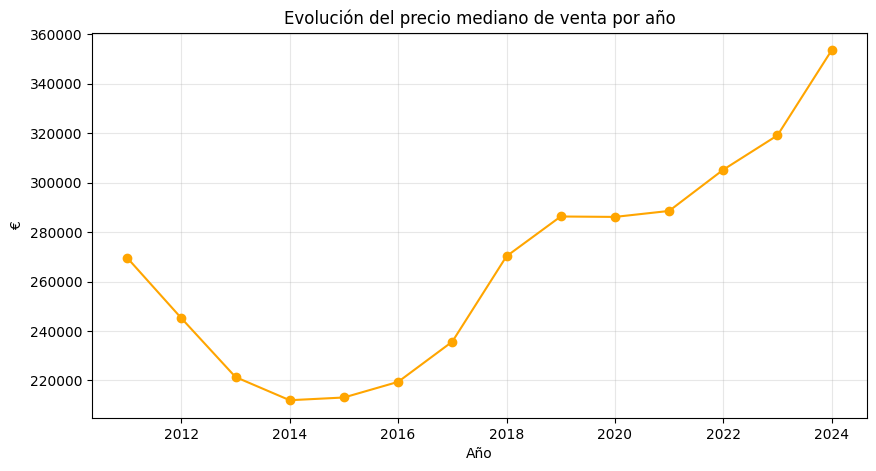

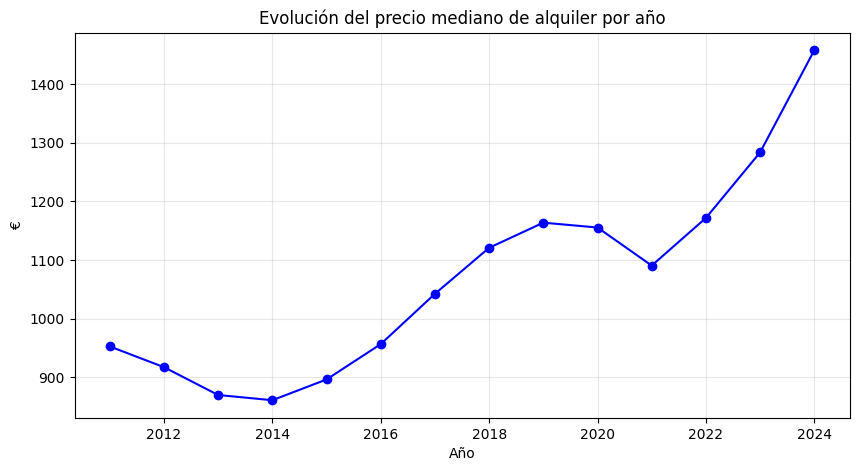

In [21]:
# Datos agregados
evolucion = df.groupby(["Ano","Operacion"])["Precio_ajustado"].median().unstack()

# Gráfico de evolución para venta
plt.figure(figsize=(10,5))
plt.plot(evolucion.index, evolucion["venta"], marker="o", color="orange")
plt.title("Evolución del precio mediano de venta por año")
plt.ylabel("€")
plt.xlabel("Año")
plt.grid(True, alpha=0.3)
plt.show()

# Gráfico de evolución para alquiler
plt.figure(figsize=(10,5))
plt.plot(evolucion.index, evolucion["alquiler"], marker="o", color="blue")
plt.title("Evolución del precio mediano de alquiler por año")
plt.ylabel("€")
plt.xlabel("Año")
plt.grid(True, alpha=0.3)
plt.show()


#### **Conclusión de Evolución Temporal**

1. Venta y alquiler muestran patrones muy parecidos:

- Caída fuerte hasta 2014.
- Recuperación sostenida desde 2015.
- Estancamiento/ligero retroceso en 2020–2021 (COVID).
- Crecimiento acelerado desde 2021.

2. El ritmo de subida post-2021 es más fuerte en alquiler que en venta, lo que sugiere presión de demanda y escasez de oferta en el mercado de arrendamiento.

3. Estos resultados permiten hablar de dos ciclos:

- 2011–2014: caída por crisis.
- 2015–2024: expansión, con récords actuales.